# 8. Predictive Analytics
Problem Statement: Build a predictive model to forecast sales for the next quarter using
historical sales data. Explain the steps taken and the rationale behind your model choice.
Requirements:
Use Python, R, or a similar tool to build the model.
Document the data preprocessing, model building, and evaluation steps.
Evaluation Criteria: Accuracy of the model, clarity of documentation, and rationale.

Mean Absolute Error (MAE): 0.29
Root Mean Squared Error (RMSE): 0.38
R-squared: 0.05


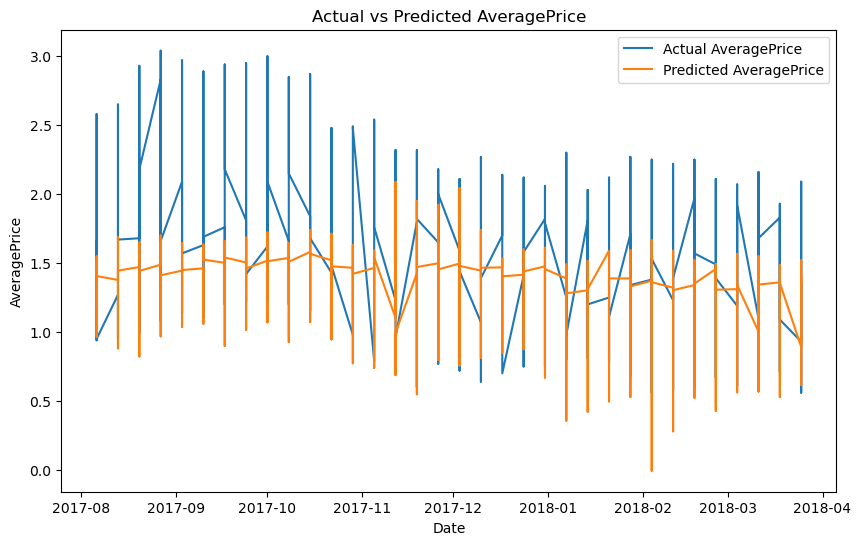

Forecasted AveragePrice for 2018-04: $1.48
Forecasted AveragePrice for 2018-05: $1.47
Forecasted AveragePrice for 2018-06: $1.46


In [1]:
# import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from datetime import datetime

# Load the data
data = pd.read_csv("C:/Users/rohit/Downloads/avocado.csv")  

# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Sort the data by date
data = data.sort_values('Date')

# Extract features from the date
data['Month'] = data['Date'].dt.month
data['Quarter'] = data['Date'].dt.quarter
data['Day_of_Week'] = data['Date'].dt.dayofweek

# Create lag features (e.g., AveragePrice from previous periods)
data['Lag_1'] = data['AveragePrice'].shift(1)
data['Lag_2'] = data['AveragePrice'].shift(2)
data['Lag_3'] = data['AveragePrice'].shift(3)

# Drop missing values due to lag features
data = data.dropna()

# Features and target
X = data[['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 
          'Large Bags', 'XLarge Bags', 'Month', 'Quarter', 'Day_of_Week', 'Lag_1', 'Lag_2', 'Lag_3']]
y = data['AveragePrice']

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R-squared: {r2:.2f}')

# Plot the actual vs predicted AveragePrice
plt.figure(figsize=(10, 6))
plt.plot(data['Date'].iloc[len(X_train):], y_test, label='Actual AveragePrice')
plt.plot(data['Date'].iloc[len(X_train):], y_pred, label='Predicted AveragePrice')
plt.xlabel('Date')
plt.ylabel('AveragePrice')
plt.title('Actual vs Predicted AveragePrice')
plt.legend()
plt.show()

# Forecast the next quarter's AveragePrice (e.g., next 3 months)
last_known = data.iloc[-1]
forecast_dates = [last_known['Date'] + pd.DateOffset(months=i) for i in range(1, 4)]
forecast_data = pd.DataFrame({
    'Total Volume': last_known['Total Volume'],
    '4046': last_known['4046'],
    '4225': last_known['4225'],
    '4770': last_known['4770'],
    'Total Bags': last_known['Total Bags'],
    'Small Bags': last_known['Small Bags'],
    'Large Bags': last_known['Large Bags'],
    'XLarge Bags': last_known['XLarge Bags'],
    'Month': [date.month for date in forecast_dates],
    'Quarter': [date.quarter for date in forecast_dates],
    'Day_of_Week': [date.dayofweek for date in forecast_dates],
    'Lag_1': y_pred[-1],  # Use last predicted AveragePrice as lag feature
    'Lag_2': y_pred[-2],
    'Lag_3': y_pred[-3]
})

# Predict future AveragePrice
future_avg_price_pred = model.predict(forecast_data)

# Display the forecast
for date, price in zip(forecast_dates, future_avg_price_pred):
    print(f'Forecasted AveragePrice for {date.strftime("%Y-%m")}: ${price:.2f}')